<a href="https://colab.research.google.com/github/alpopfares25/Weather-Prediction/blob/main/Weather_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
import seaborn as sns #for visualization

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/seattle-weather.csv')
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


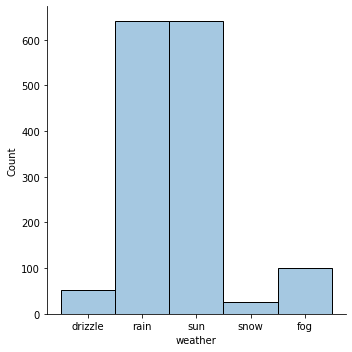

In [ ]:
sns.displot(df, x="weather", alpha=.4, rug=False)

In [ ]:
df.isnull().sum()
df

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


In [ ]:
l = LabelEncoder()
df['weather']=l.fit_transform(df['weather'])
df.head()
#labels
#dizzle=0
#rain=2
#sun=4
#fog=1
#snow=3

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,0
1,2012-01-02,10.9,10.6,2.8,4.5,2
2,2012-01-03,0.8,11.7,7.2,2.3,2
3,2012-01-04,20.3,12.2,5.6,4.7,2
4,2012-01-05,1.3,8.9,2.8,6.1,2


In [ ]:
X=df.drop(['date','weather'],axis=1)
y=df['weather']

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.3)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [ ]:
lr = LogisticRegression()
rf = RandomForestClassifier(n_estimators=300)
gbc = GradientBoostingClassifier()
dt = DecisionTreeClassifier()
svc = SVC()
knn= KNeighborsClassifier()


In [ ]:
lr.fit(x_train,y_train)
rf.fit(x_train,y_train)
gbc.fit(x_train,y_train)
dt.fit(x_train,y_train)
svc.fit(x_train, y_train)
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [ ]:
print('LogReg Accuracy = {:.2f}'.format(lr.score(x_test,y_test)))
print('RandFor Accuracy = {:.2f}'.format(rf.score(x_test,y_test)))
print('GBC Accuracy = {:.2f}'.format(gbc.score(x_test,y_test)))
print('DT Accuracy = {:.2f}'.format(dt.score(x_test,y_test)))
print('SVC Accuracy = {:.2f}'.format(svc.score(x_test,y_test)))
print('KNN Accuracy = {:.2f}'.format(knn.score(x_test,y_test)))

LogReg Accuracy = 0.78
RandFor Accuracy = 0.85
GBC Accuracy = 0.85
DT Accuracy = 0.76
SVC Accuracy = 0.76
KNN Accuracy = 0.69


In [ ]:
import os
import pickle

os.chdir('/content/drive/MyDrive')
with open("weather","wb")as weather:
  pickle.dump(rf,weather)

In [ ]:
with open("SCaler","wb")as SCaler:
  pickle.dump(sc,SCaler)

In [ ]:
X.columns


Index(['precipitation', 'temp_max', 'temp_min', 'wind'], dtype='object')